In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine, MetaData, Table, Column, String, Float, Integer

In [2]:
username = "root"
password = "Asdf%401234"
host = "localhost"
database = "vendor"

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

In [3]:
df = pd.read_sql_query("select * from vendor_sales_summary",engine)

In [4]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3.811252e+06,142049.0,5.101920e+06,672819.341167,260999.198781,68601.680141,1.290668e+06,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3.804041e+06,160247.0,4.819073e+06,561512.375851,294438.657920,144929.240166,1.015032e+06,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3.418304e+06,187140.0,4.538121e+06,461140.145689,343854.067793,123780.220203,1.119817e+06,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3.261198e+06,200412.0,4.475973e+06,420050.005789,368242.797294,257032.069523,1.214775e+06,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3.023206e+06,135838.0,4.223108e+06,545778.283312,249587.828808,257032.069523,1.199902e+06,28.412765,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.640000e+00,5.0,1.595000e+01,10.960000,0.550000,27100.410036,1.331000e+01,83.448275,2.500000,6.041666
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.340000e+00,134.0,6.566000e+01,1.470000,7.040000,50293.619843,6.332000e+01,96.436187,22.333333,28.059830
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.480000e+00,2.0,1.980000e+00,0.990000,0.100000,14069.870026,5.000000e-01,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.470000e+00,72.0,1.432800e+02,77.610000,15.120000,257032.069523,1.418100e+02,98.974037,72.000000,97.469386


### EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693354,123067.799573,0.710000,453.457510,3655.464971,20738.244730,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074317,167655.266047,0.000000,729.219982,5298.044970,28396.914894,5.101920e+06
TotalSalesPrice,10692.0,18793.783517,44952.773491,0.000000,289.709993,2857.799950,16059.562242,6.728193e+05


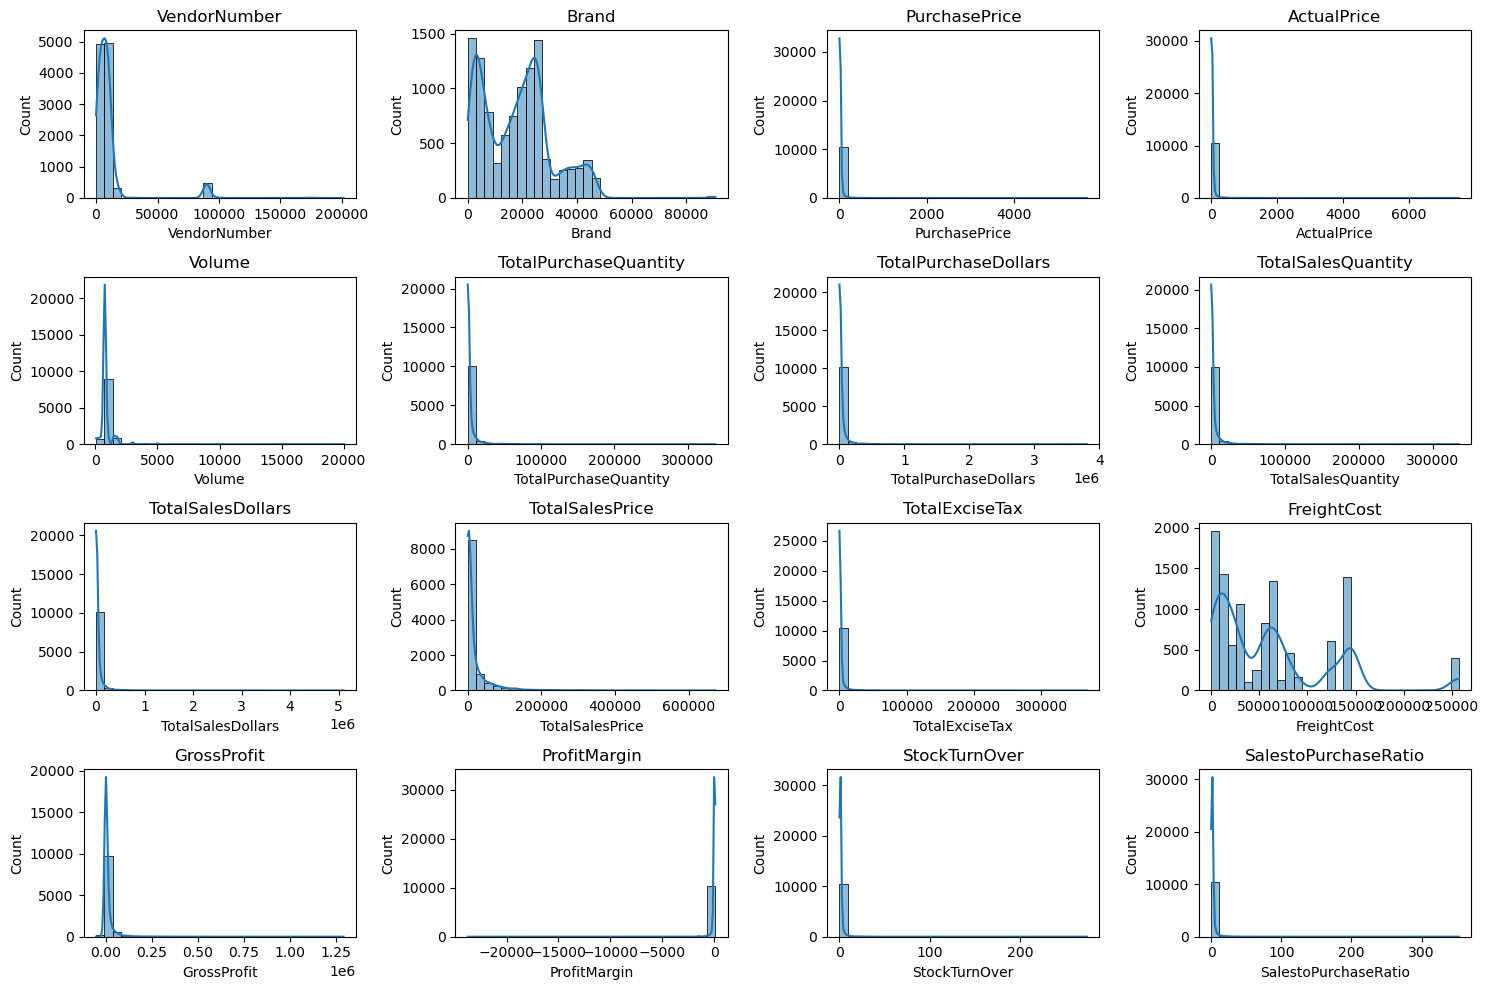

In [6]:
#Distribution Plot for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

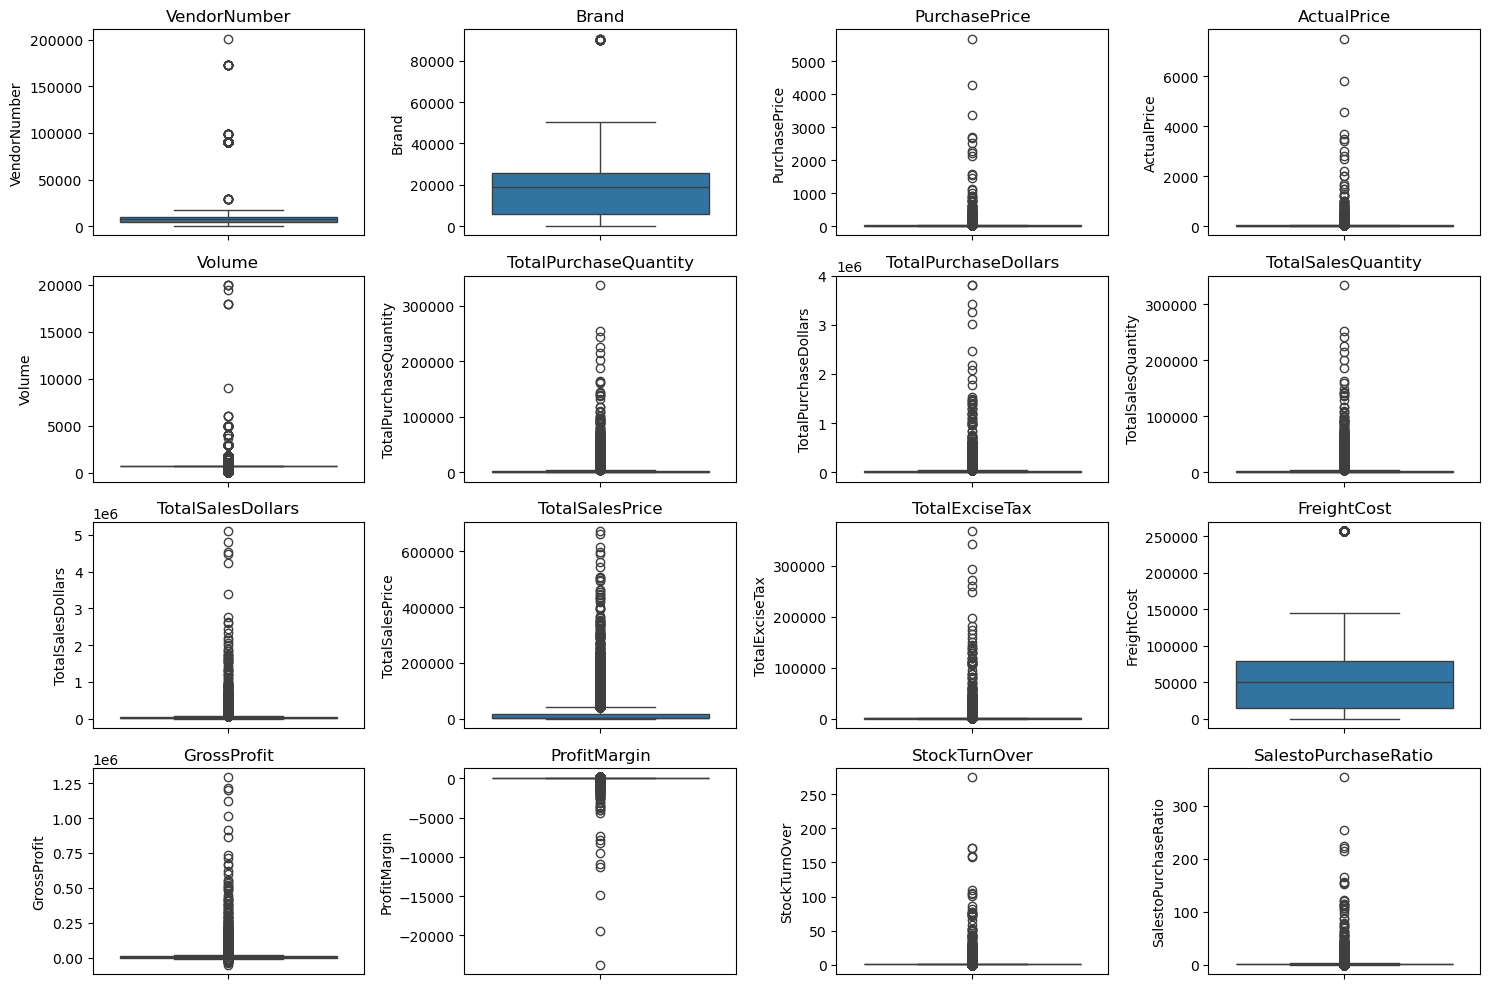

In [7]:
#Distribution Plot for Numerical Columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

#### Outliers Indicated by High Standard Deviations:


In [8]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnOver', 'SalestoPurchaseRatio'],
      dtype='object')

In [9]:
# Filtring the data by removing inconsistencies
df =pd.read_sql_query("""select * from 
vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0
""",engine)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3.811252e+06,142049.0,5.101920e+06,672819.341167,260999.198781,68601.680141,1.290668e+06,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3.804041e+06,160247.0,4.819073e+06,561512.375851,294438.657920,144929.240166,1.015032e+06,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3.418304e+06,187140.0,4.538121e+06,461140.145689,343854.067793,123780.220203,1.119817e+06,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3.261198e+06,200412.0,4.475973e+06,420050.005789,368242.797294,257032.069523,1.214775e+06,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3.023206e+06,135838.0,4.223108e+06,545778.283312,249587.828808,257032.069523,1.199902e+06,28.412765,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.640000e+00,5.0,1.595000e+01,10.960000,0.550000,27100.410036,1.331000e+01,83.448275,2.500000,6.041666
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.340000e+00,134.0,6.566000e+01,1.470000,7.040000,50293.619843,6.332000e+01,96.436187,22.333333,28.059830
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.480000e+00,2.0,1.980000e+00,0.990000,0.100000,14069.870026,5.000000e-01,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.470000e+00,72.0,1.432800e+02,77.610000,15.120000,257032.069523,1.418100e+02,98.974037,72.000000,97.469386


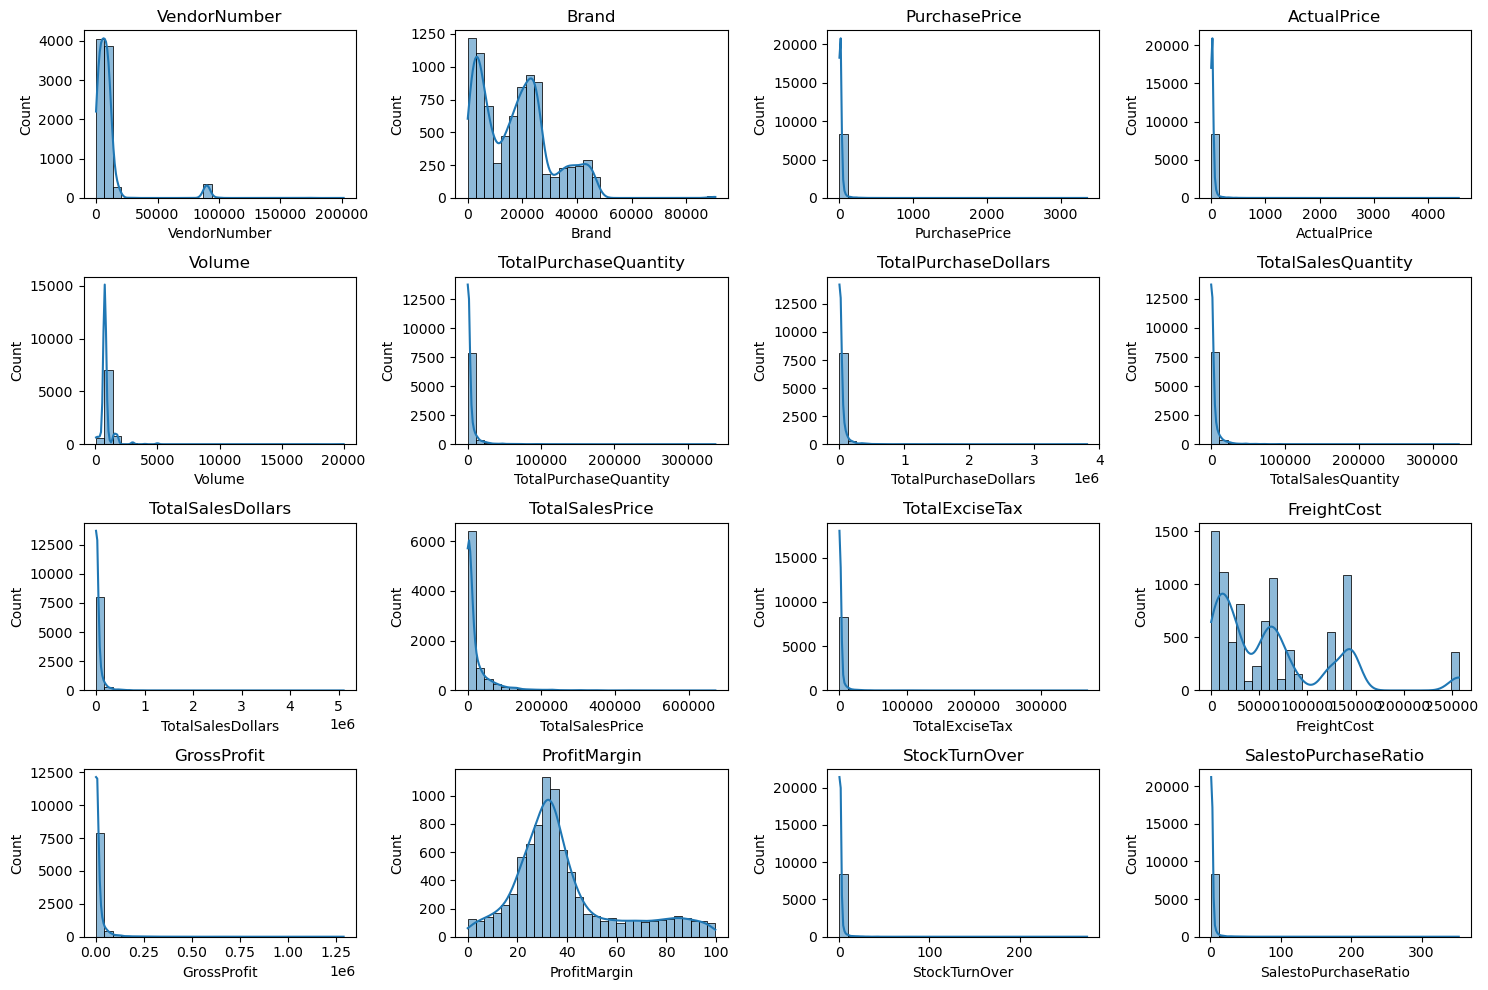

In [11]:
#Distribution Plot for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

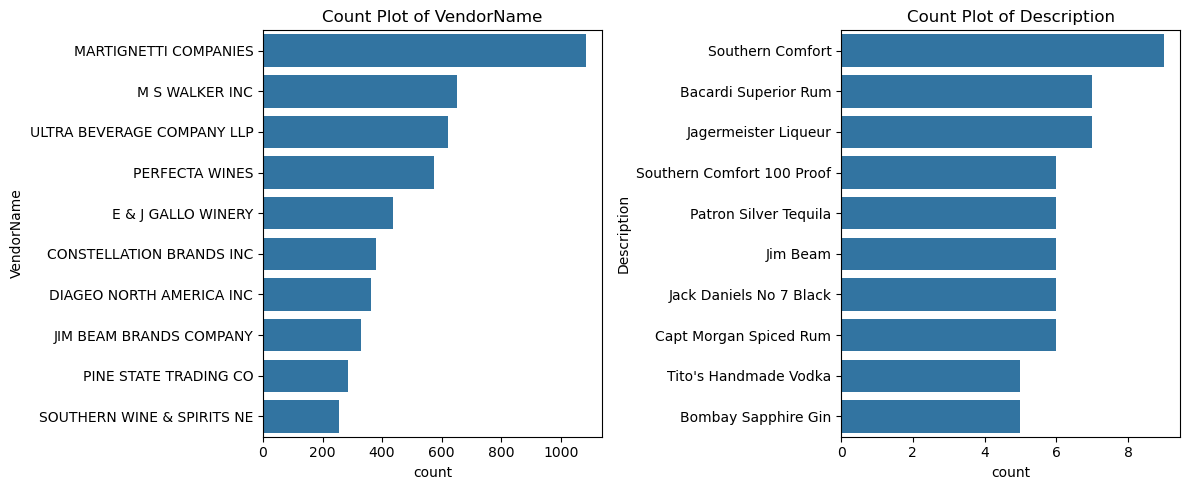

In [12]:
# Count Plot for Categorical Columns
categorical_cols = ['VendorName','Description']
plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

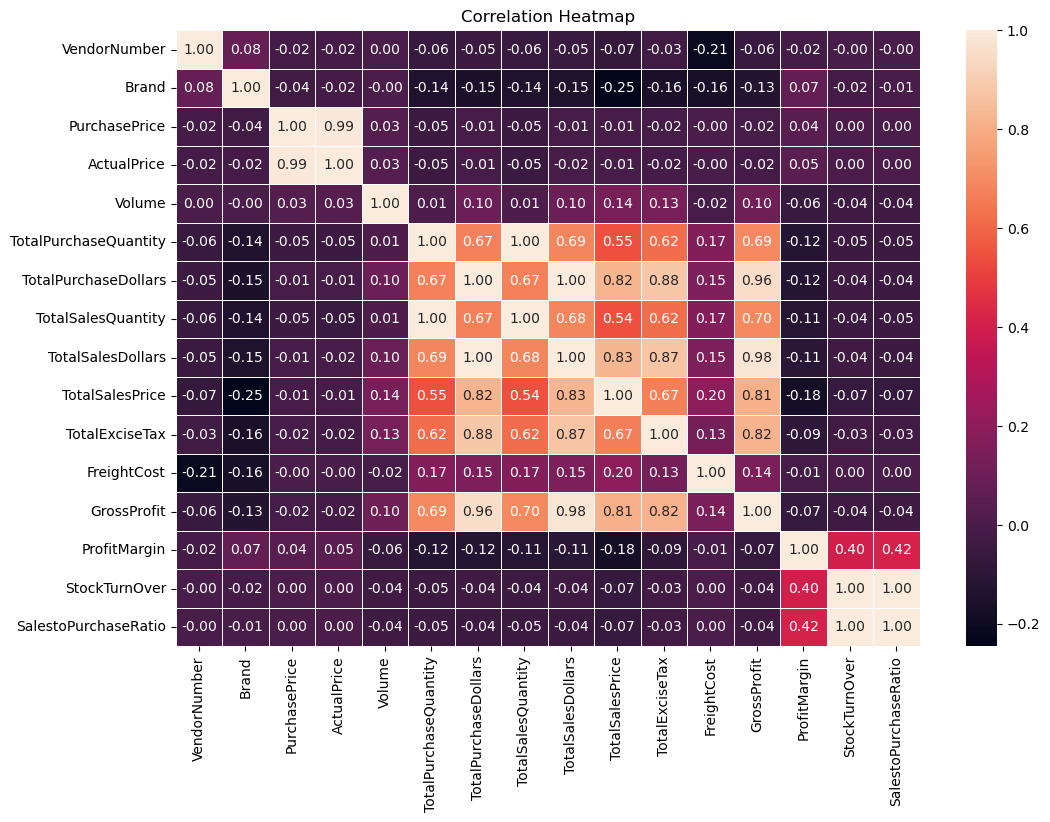

In [13]:
# Correlation HeatMap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights


## Data Analysis

### 1. Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [14]:
brand_performance = df.groupby("Description").agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin' : 'mean'}).reset_index()

In [15]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

560.2989873886107

In [17]:
high_margin_threshold

64.9701755382603

In [18]:
# filtering brands qith low sales but high profit
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold)]
print("Brands qith low sales but high profit margins:")
display(target_brands.sort_values("TotalSalesDollars"))

Brands qith low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.990000,66.466467
2369,Debauchery Pnt Nr,11.580000,65.975820
2070,Concannon Glen Ellen Wh Zin,15.950000,83.448275
2188,Crown Royal Apple,27.859999,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.959999,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.679998,76.747312
2271,Dad's Hat Rye Whiskey,538.890007,81.851583
57,A Bichot Clos Marechaudes,539.939995,67.740861
6245,Sbragia Home Ranch Merlot,549.750000,66.444748


## 2. Which Vendors and brands demonstrate the highest sales performance ?

In [19]:
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [20]:
def format_dollars(value):
    if value >= 1000000:
        return f"{value/1000000:.2f}M"
    elif value >= 1000:
        return f"{value/1000:.2f}K"
    else:
        return str(value)

In [21]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [22]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\3310194954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\3310194954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette= 'Reds_r')


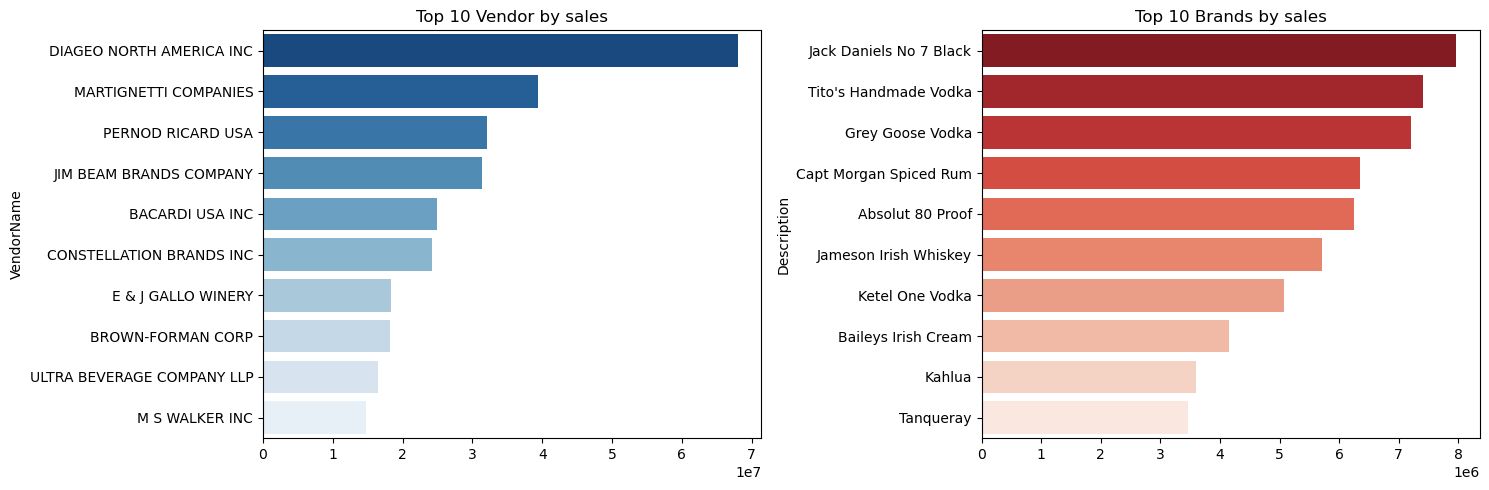

In [23]:
plt.figure(figsize=(15,5))

# Plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title("Top 10 Vendor by sales")
# Plot for top Brands 
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette= 'Reds_r')
plt.title("Top 10 Brands by sales")

plt.tight_layout()


## 3. Which Vendors contribute the most to total purchase dollars?

In [24]:
vendor_performance = df.groupby("VendorName").agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()

In [25]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [26]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,4.461600e+02,2.583700e+02,7.045300e+02,0.000145
1,ALISA CARR BEVERAGES,2.569812e+04,7.877282e+04,1.044709e+05,0.008361
2,ALTAMAR BRANDS LLC,1.170620e+04,4.000611e+03,1.570681e+04,0.003809
3,AMERICAN SPIRITS EXCHANGE,9.340800e+02,5.770800e+02,1.511160e+03,0.000304
4,AMERICAN VINTAGE BEVERAGE,1.044357e+05,3.516785e+04,1.396035e+05,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,4.269464e+04,1.352249e+04,5.621713e+04,0.013892
115,WESTERN SPIRITS BEVERAGE CO,2.984169e+05,1.068380e+05,4.052548e+05,0.097097
116,WILLIAM GRANT & SONS INC,5.876538e+06,1.693338e+06,7.569876e+06,1.912073
117,WINE GROUP INC,5.203801e+06,3.100242e+06,8.304043e+06,1.693182


In [27]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [28]:
# Top 10 vendors 
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2249468732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2249468732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2249468732.py:5: SettingWithCopyWarning: 
A value 

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [29]:
top_vendors['Cmulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2017985236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['Cmulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cmulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\3923087692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\3923087692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)
C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\3923087692.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

Text(0.5, 1.0, 'Pareto Chart: Vendor Contribution to Total Purchases')

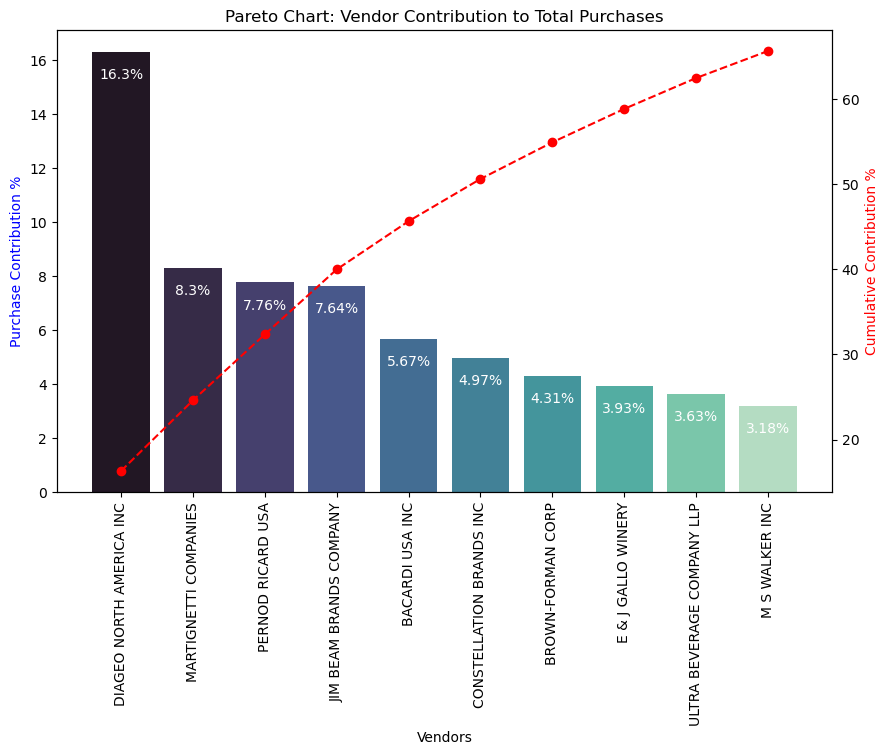

In [30]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
fig,ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')
                           
# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle= 'dashed', label='Cumulative %')
ax1.set_xticklabels(top_vendors [ 'VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

## 4. How much of total procurement is dependent on the top vendors?

In [31]:
print(f"Total Purchase Contribution of top 10 vendors is {round (top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


## 5. Does the purchaseing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [33]:
df['Ordersize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium','Large'])

In [34]:
df[['Ordersize','TotalPurchaseQuantity']]

,Ordersize,TotalPurchaseQuantity
0,Large,145080.0
1,Large,164038.0
2,Large,187407.0
3,Large,201682.0
4,Large,138109.0
...,...,...
8560,Small,2.0
8561,Small,6.0
8562,Small,2.0
8563,Small,1.0


In [35]:
df.groupby('Ordersize')[['UnitPurchasePrice']].mean()

C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2596566703.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Ordersize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
Ordersize,
Small,39.057543
Medium,15.486414
Large,10.777625


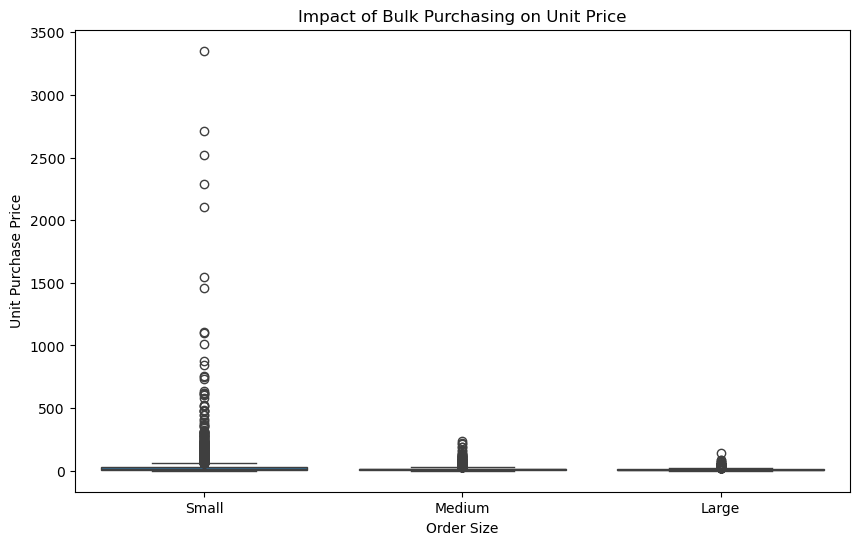

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x ='Ordersize', y ='UnitPurchasePrice')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.show()

## 6. Which Vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [41]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending = True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


## 7. How much capital is locked in unsold inventory per vendors contribute the most to it?

In [46]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print("Total Unsold Capital:", format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [44]:
unsold_inventory

0       3031.0
1       3791.0
2        267.0
3       1270.0
4       2271.0
         ...  
8560      -3.0
8561    -128.0
8562       0.0
8563     -71.0
8564     -85.0
Length: 8565, dtype: float64

In [50]:
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the Highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


## 8. What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [51]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [52]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [53]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


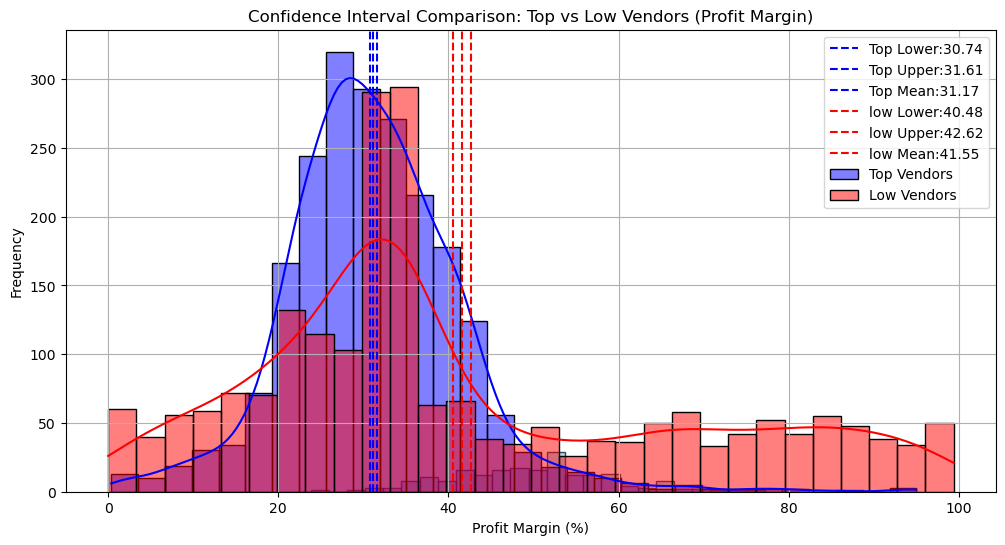

In [66]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")
# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(data, bins=25, alpha=0.7, color='skyblue', edgecolor='black')

# Top Vendors Plot
sns.histplot(top_vendors, kde=True,color="blue",bins=30,alpha=0.5,label="Top Vendors")
plt.axvline(top_lower , color='blue', linestyle='--', label=f'Top Lower:{top_lower:.2f}')
plt.axvline(top_upper , color='blue', linestyle='--', label=f'Top Upper:{top_upper:.2f}')
plt.axvline(top_mean , color='blue', linestyle='--', label=f'Top Mean:{top_mean:.2f}')


# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label = "Low Vendors")
plt.axvline(low_lower , color='red', linestyle='--', label=f'low Lower:{low_lower:.2f}')
plt.axvline(low_upper , color='red', linestyle='--', label=f'low Upper:{low_upper:.2f}')
plt.axvline(low_mean , color='red', linestyle='--', label=f'low Mean:{low_mean:.2f}')


# Final Plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:

$H_0$. (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

$H_1$, (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [75]:
from scipy.stats import ttest_ind


top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

# Split groups
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform Two-Simple T-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print Result
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Hypothesis Decision
if p_value < 0.05:
    print("Reject $H_0$: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject $H_1$: No Significant difference in profit margins")

T-Statistic: -17.6440, P-Value: 0.0000
Reject $H_0$: There is a significant difference in profit margins between top and low-performing vendors.


C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2057437139.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_vendors, shade=True, label='Top Vendors', linewidth=2)
C:\Users\ary33\AppData\Local\Temp\ipykernel_19288\2057437139.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_vendors, shade=True, label='Low Vendors', linewidth=2)


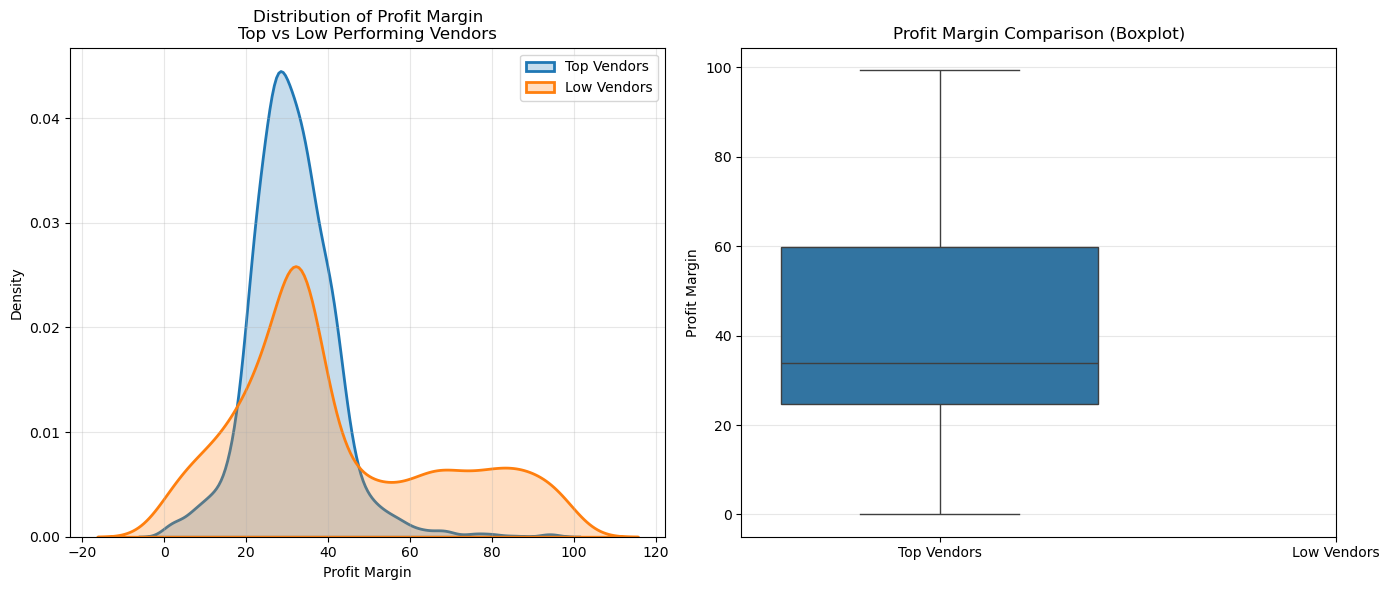

In [77]:
plt.figure(figsize=(14,6))

# --- 1. KDE / Histogram Plot ---
plt.subplot(1,2,1)
sns.kdeplot(top_vendors, shade=True, label='Top Vendors', linewidth=2)
sns.kdeplot(low_vendors, shade=True, label='Low Vendors', linewidth=2)

plt.title("Distribution of Profit Margin\nTop vs Low Performing Vendors")
plt.xlabel("Profit Margin")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

# --- 2. Boxplot ---
plt.subplot(1,2,2)
sns.boxplot(data=[top_vendors, low_vendors])
plt.xticks([0,1], ['Top Vendors', 'Low Vendors'])
plt.title("Profit Margin Comparison (Boxplot)")
plt.ylabel("Profit Margin")
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
